In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'November 2018'

<h2>Основная таблица</h2>

In [6]:
rep_2017 = report['2017':]
rep_2018 = report['2018':] # данные за 2018 год
rep_2018

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-01-31     2477   1881         32   5   0     1     74     136      12
2018-02-28     2527   1625         44   7   0     3    121     130      16
2018-03-31     2568   1997         51   6   0    10     79     197      12
2018-04-30     2359   2410         74   5   0     1     56     129       9
2018-05-31     2166   2355         65   4   0     1     42     131      12
2018-06-30     2361   2369         32   3   0     7     64     150      17
2018-07-31     2435   2513         69   1   0     7     51     184       7
2018-08-31     2637   2437         59   1   0     5    115     161       9
2018-09-30     2591   2343         85   4   0     2     84     134       9
2018-10-31     2746   2665         77   2   0     7     86     166      12
2018-11-30     2914   2444         61   3   0     5    162     182      24

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-11-30      168   -221        -16   1   0    -2     76      16      12

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

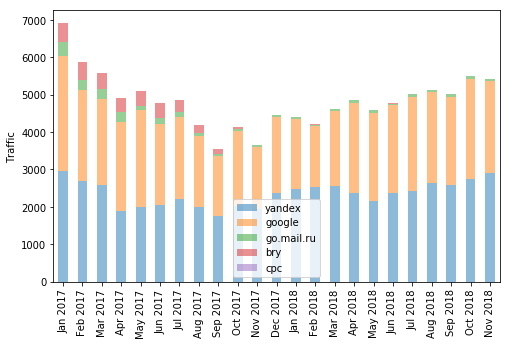

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2017.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2017.index]);

<h3>Линейная диаграмма изменений трафика</h3>

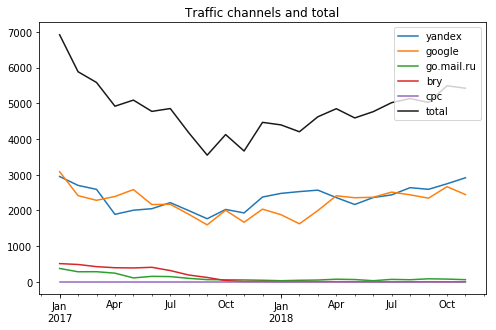

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2017.channels.plot(ax=ax);
rep_2017.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [14]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing       0                                                amazon      2
go.mail.ru 0                                             (not set)     61
google     0                                         дешевые двери    279
           1                                          двери дешево    238
           2                                       двери из дерева    185
           3                             np - /?cnt=catalog&r=2438    137
           4                             np - /?cnt=catalog&r=1428    121
           5                                                np - /     60
           6                                      np - /?pid=pokaz     54
           7                                         двери продажа     53
           8                                дверное полотно дешево     26
           9                                         полотно двери     20
           10                               дверные полотна купить     10
           11                                     np - /?pid=about      9
           12                              np - /?pid=menu-katalog      8
           13                                 дверное полотно цена      8
           14                            np - /?cnt=catalog&r=2966      7
           15                             np - /?cnt=catalog&r=623      6
           16                                     двери с коробкой      5
           17                            np - /?cnt=catalog&r=1464      4
           18                            np - /?cnt=catalog&r=1792      4
           19                              np - /?cnt=catalog&r=57      4
           20                                       двери в ванную      4
           21                                      полотна дверные      4
           22                            np - /?cnt=catalog&r=1809      3
           23                                      дверные полотна      3
           24                                    полотно для двери      3
           25                             np - /?cnt=catalog&r=300      2
           26                            np - /?cnt=catalog&r=3405      2
           27                            np - /?cnt=catalog&r=3589      2
...                                                            ...    ...
yandex     2014                         sjb двери официальный сайт      1
           2015               smart company дверное полотно из мдф      1
           2016  snow veralinga отзывы кухонные двери гармошка+...      1
           2017               sofia двери официальный сайт каталог      1
           2018          sofia двери официальный сайт каталог цены      1
           2019                               srbu ru дверей склад      1
           2020  st22 матекс гладкие дверные полотна euroliht г...      1
           2021  star wars knights of the old republic 2 дверь ...      1
           2022                     stardis двери официальный сайт      1
           2023                      status двери официальный сайт      1
           2024                      status официальный сайт двери      1
           2025                               steelline двери сайт      1
           2026          stockholm цветные двери окрашенные эмалью      1
           2027                   superlock двери официальный сайт      1
           2028                    sw kotor 2 дверь склада дроидов      1
           2029  symetric ru slide wood 3000 мм для двух дверны...      1
           2030                              tandoor двери каталог      1
           2031                             techno дверное полотно      1
           2032                                 tivoli двери эмаль      1
           2033  tkst ldthb ghjabkmljhc дверное полотно 700 мм ...      1
           2034                          tv панель на дверцу кухню      1
           2035                       union двери официальный сайт      1
           2036   union двери официальный сайт каталог цены мос

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [25]:
data.groupby(level=0, axis=0)[kw].apply(lambda x: x.xs(x.visit.idxmax())) #.xs(0, level=1)

,keyword,visit
bing,amazon,2
go.mail.ru,(not set),61
google,дешевые двери,279
yahoo,np - /?cnt=catalog&r=2438,1
yandex,дверь гармошка,124


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [26]:
data_grupped = data.sort_values('visit', ascending=False).groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.iloc[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                       amazon      2
go.mail.ru 0                    (not set)     61
google     0                дешевые двери    279
           1                 двери дешево    238
           2              двери из дерева    185
           3    np - /?cnt=catalog&r=2438    137
           4    np - /?cnt=catalog&r=1428    121
yahoo      0    np - /?cnt=catalog&r=2438      1
yandex     6               дверь гармошка    124
           0                    (not set)     69
           7               двери гармошка     54
           8  дверь гармошка леруа мерлен     41
           9              дверное полотно     29